<a href="https://colab.research.google.com/github/syedshubha/1MAT120/blob/main/Lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solving ODE
Topic covered:


1.   Solving ODE using sympy
2.   Solving ODE using Euler's method



In [ ]:
from numpy import *
from sympy import *
from matplotlib.pyplot import *
x, t = symbols('x t')

## $ \frac{dy}{dx}= 25x(1-y)$

In [ ]:
y = Function('y')(x)
expr = Eq(diff(y,x,1), 25*x*(1-y))
expr

Eq(Derivative(y(x), x), 25*x*(1 - y(x)))

In [ ]:
dsolve(expr)

Eq(y(x), C1*exp(-25*x**2/2) + 1)

### $$ \frac{d^2y}{dt^2} + 25 y =0 $$
$ $

In [ ]:
y = Function('y')(t)
expr = Eq(diff(y,t,2)+25*y, 0)
dsolve(expr)

Eq(y(t), C1*sin(5*t) + C2*cos(5*t))

## Boundary Condition

### $$\frac{d^3f}{dx^3} = x, f(0)= 1, f(1)=2, f'(2)= 3 $$

In [ ]:
f = symbols("f", cls= Function)
expr = Eq(diff(f(x),x,3), x)
boundary = {f(x).subs(x,0): 1,f(x).subs(x,1): 2, diff(f(x),x).subs(x,2): 3}
dsolve(expr, ics= boundary)

Eq(f(x), x**4/24 + 17*x**2/72 + 13*x/18 + 1)

# $dy/dt = y , y(0)= 1$

In [ ]:
y = Function("y")(t)
expr = Eq(diff(y,t), y)
boundary = {y.subs(t,0): 1}
dsolve(expr, ics = boundary)

Eq(y(t), exp(t))

# System of Differential equation

### $dx/dt = 3y + 2t $
### $dy/dt = -x + 2y + 3$

In [ ]:
t = symbols('t')
# x, y = symbols('x y', cls = Function)
x = Function('x') (t)
y = Function('y') (t)

Eq1 = Eq(diff(x,t), 3*y+2*t)
Eq2 = Eq(diff(y,t), -x+2*y+3)

In [ ]:
expr = [Eq1, Eq2]
solution = dsolve(expr)

In [ ]:
for i in range(2):
  display(solution[0])

Eq(x(t), -4*t*sin(sqrt(2)*t)**2/3 - 4*t*cos(sqrt(2)*t)**2/3 - (C1 - sqrt(2)*C2)*exp(t)*sin(sqrt(2)*t) + (sqrt(2)*C1 + C2)*exp(t)*cos(sqrt(2)*t) + 25*sin(sqrt(2)*t)**2/9 + 25*cos(sqrt(2)*t)**2/9)

Eq(x(t), -4*t*sin(sqrt(2)*t)**2/3 - 4*t*cos(sqrt(2)*t)**2/3 - (C1 - sqrt(2)*C2)*exp(t)*sin(sqrt(2)*t) + (sqrt(2)*C1 + C2)*exp(t)*cos(sqrt(2)*t) + 25*sin(sqrt(2)*t)**2/9 + 25*cos(sqrt(2)*t)**2/9)

With Boundary Condition

#### $x(0)=1, y'(0)=2$

In [ ]:
boundary = {x.subs(t,0): 1, diff(y,t).subs(t,0): 2}
solution = dsolve(expr, ics = boundary)
for i in range(2):
  display(solution[i])

Eq(x(t), -4*t*sin(sqrt(2)*t)**2/3 - 4*t*cos(sqrt(2)*t)**2/3 + 14*sqrt(2)*exp(t)*sin(sqrt(2)*t)/9 - 16*exp(t)*cos(sqrt(2)*t)/9 + 25*sin(sqrt(2)*t)**2/9 + 25*cos(sqrt(2)*t)**2/9)

Eq(y(t), -2*t*sin(sqrt(2)*t)**2/3 - 2*t*cos(sqrt(2)*t)**2/3 + 10*sqrt(2)*exp(t)*sin(sqrt(2)*t)/9 + 4*exp(t)*cos(sqrt(2)*t)/9 - 4*sin(sqrt(2)*t)**2/9 - 4*cos(sqrt(2)*t)**2/9)

# Euler method
### You can also learn RK method (scipy odeint uses this)

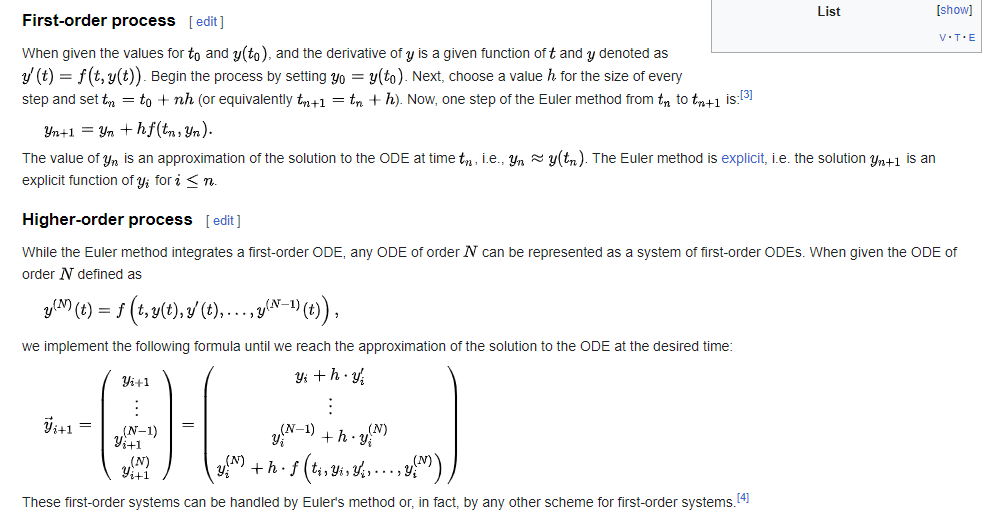

##$\frac{dy}{dx} = y , y(0)=1$

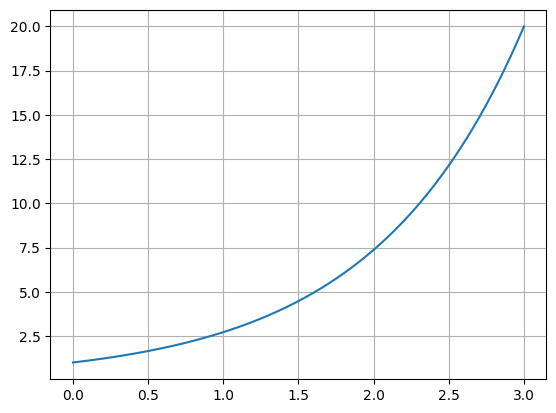

In [ ]:
a = 0
b = 3
N = 1001
h = (b-a)/(N-1)
x = linspace(a,b,N)
y = 0*x
y[0] = 1
for i in range(1,N):
  y[i] = y[i-1] + h*y[i-1]
plot(x,y)
grid()

#$dy/dx= e^x sin(x+y), y(0)=1$

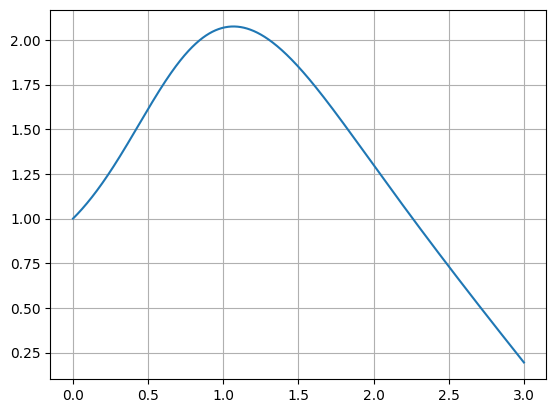

In [ ]:
f = lambda a, b : (e**a)*sin(a+b)
a = 0
b = 3
N = 1001
h = (b-a)/(N-1)
x= linspace(a,b,N)
y = 0* x
y[0] = 1

for i in range(1,N):
  y[i] = y[i-1] + h*f(x[i-1], y[i-1])
plot(x,y)
grid()
show()

#$\frac{d^2x}{dt^2} + 16x =sin(3t), x(0)= 2, x'(0) = 0$

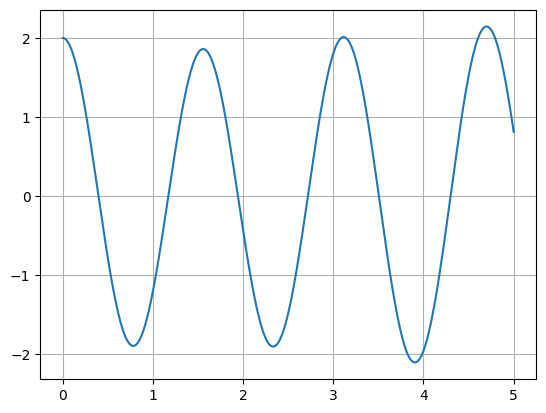

In [ ]:
f = lambda a, b : sin(3*a) - 16*b
a = 0
b = 5
N = 10001
h = (b-a)/(N-1)
t= linspace(a,b,N)
x = 0* t
v = 0* t # v =dx/dt
x[0] = 2
v[0] = 0


for i in range(1,N):
  v[i] = v[i-1] + h*f(t[i-1], x[i-1])
  x[i] = x[i-1] + h*v[i] #noticee this
plot(t,x)
grid()
show()

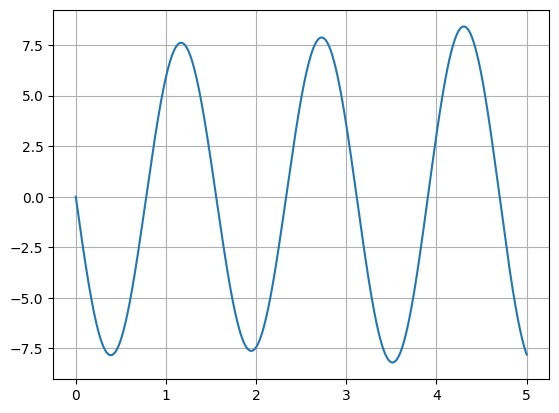

In [ ]:
plot(t,v)
grid()
show()

#Projectile motion
## $x'=3, y'= 4-10t, x(0)=y(0)=0$

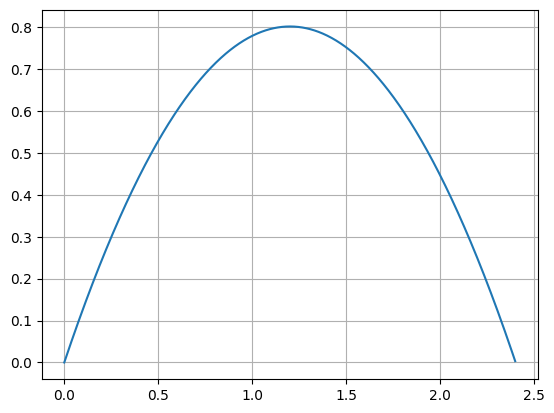

In [ ]:
a = 0
b = 0.8 # Flight time
N = 1001
h = (b-a)/(N-1)
t= linspace(a,b,N)
x = 0* t
y = 0* t


for i in range(1,N):
  y[i] = y[i-1] + h*(4-10*t[i-1])
  x[i] = x[i-1] + h*3
plot(x,y)
grid()
show()